##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**ASSIGNMENT 1 - LINEAR MODELS FOR REGRESSION AND CLASSIFICATION**
--------------------------------------------------------------------------------
***Team number: 47***

---
***Full names of all students in the team: Ninad Agrawal , Aryan Saluja , Vansh Agrawal , Aditya Kumar Sharma , Ajeya Hegade K R***

---
***Id number of all students in the team: 2021A7PS2948H , 2021A7PS2947H , 2021A7PS2998H , 2021A7PS3112H , 2021A8PS3197H***


This assignment aims to identify the differences between three sets of Machine Learning models.

# **_1. Dataset Generation_**

You are given a sample Diabetes dataset. Using this, please develop your own dataset consisting of 500 records. You can use the given code to generate your own dataset. Submit the generated dataset as a .csv file along with your python notebook.

## Loading the Dataset

In [9]:
%pip install sdv
%pip install urllib3==1.26

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.5/70.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.3/160.3 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 15.6 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.4
    Uninstalling urllib3-2.0.4:
      Successfully uninstalled urllib3-2.0.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.7/136.7 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Fou

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

In [4]:
real_data = pd.read_excel('/content/sample_data/diabetes2.xlsx')

In [5]:
real_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
real_data['Outcome'] = real_data['Outcome'].astype(bool)

In [7]:
from sdv.metadata import SingleTableMetadata

In [8]:
metadata = SingleTableMetadata()

In [9]:
metadata.detect_from_dataframe(data = real_data)

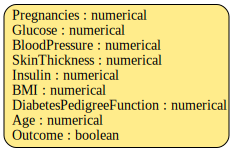

In [10]:
metadata.visualize()

## Creating a Synthesizer

In [11]:
from sdv.lite import SingleTablePreset
synthesizer = SingleTablePreset(metadata, name='FAST_ML')

In [12]:
synthesizer.fit( data = real_data)

### Creating the Synthetic Data

In [13]:
synthetic_data = synthesizer.sample(num_rows=500)

synthetic_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9,142,82,33,136,34.130776,0.329741,43,False
1,1,135,31,12,127,27.901557,0.362625,29,True
2,3,139,47,27,0,46.562694,0.795202,26,False
3,1,112,77,25,0,29.384816,0.575448,38,False
4,1,116,96,12,61,30.666457,0.317321,21,False


## 4.2 Data Quality

Other columns in our data are not sensitive. The synthetic data replicates the **mathematical properties** of these columns. To get more insight, we can use the `evaluation` module.

In [14]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 36/36 [00:01<00:00, 30.87it/s]

Overall Quality Score: 88.98%

Properties:
- Column Shapes: 86.07%
- Column Pair Trends: 91.89%


In [15]:
quality_report.get_visualization('Column Shapes')

## 4.3 Visualizing the data

For even more insight, we can visualize the real vs. synthetic data.

Let's perform a 1D visualization comparing a column of the real data to the synthetic data.

In [16]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name = 'DiabetesPedigreeFunction',
    metadata=metadata
)

fig.show()

In [17]:
from sdv.evaluation.single_table import get_column_pair_plot

fig = get_column_pair_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_names=['DiabetesPedigreeFunction', 'Outcome'],
    metadata=metadata
)

fig.show()

# 5. Saving and Loading
We can save the synthesizer to share with others and sample more synthetic data in the future.


In [ ]:
synthetic_data.to_csv('/content/sample_data/diabetes3.csv', index=True)



```
# This is formatted as code
```

# ***2. Preprocess and perform exploratory data analysis of the dataset obtained***

In [18]:
df = pd.read_csv('/content/sample_data/diabetes3.csv')

In [20]:
df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,9,142,82,33,136,34.130776,0.329741,43,False
1,1,1,135,31,12,127,27.901557,0.362625,29,True
2,2,3,139,47,27,0,46.562694,0.795202,26,False
3,3,1,112,77,25,0,29.384816,0.575448,38,False
4,4,1,116,96,12,61,30.666457,0.317321,21,False


In [21]:
df = df.drop('Unnamed: 0' , axis = 1)

In [22]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9,142,82,33,136,34.130776,0.329741,43,False
1,1,135,31,12,127,27.901557,0.362625,29,True
2,3,139,47,27,0,46.562694,0.795202,26,False
3,1,112,77,25,0,29.384816,0.575448,38,False
4,1,116,96,12,61,30.666457,0.317321,21,False
5,1,118,70,29,143,34.098863,0.657422,31,False
6,7,90,41,6,0,29.914276,0.447896,21,True
7,11,148,96,23,183,38.765739,0.578585,50,True
8,2,137,44,0,167,24.837346,0.078000,28,False
9,0,76,67,32,102,34.601869,0.748979,29,False


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               500 non-null    int64  
 1   Glucose                   500 non-null    int64  
 2   BloodPressure             500 non-null    int64  
 3   SkinThickness             500 non-null    int64  
 4   Insulin                   500 non-null    int64  
 5   BMI                       500 non-null    float64
 6   DiabetesPedigreeFunction  500 non-null    float64
 7   Age                       500 non-null    int64  
 8   Outcome                   500 non-null    bool   
dtypes: bool(1), float64(2), int64(6)
memory usage: 31.9 KB


In [24]:
df.isnull().describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500,500,500,500,500,500,500,500,500
unique,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False
freq,500,500,500,500,500,500,500,500,500


In [25]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4.124000,119.910000,69.778000,22.712000,100.114000,32.509504,0.500096,34.338000
std,2.926046,32.401012,19.431312,14.840537,92.437299,8.140029,0.286990,9.951574
min,0.000000,19.000000,11.000000,0.000000,0.000000,10.859101,0.078000,21.000000
25%,2.000000,97.000000,57.000000,11.000000,7.750000,26.780180,0.277179,26.750000
50%,4.000000,120.000000,70.000000,22.000000,84.000000,32.558151,0.480839,33.000000
75%,6.000000,142.000000,83.000000,33.000000,162.250000,37.790219,0.689143,40.000000
max,14.000000,199.000000,122.000000,65.000000,430.000000,55.315711,1.399883,72.000000


In [26]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Normalizing the Data

In [27]:
def function(col):
  return (col - col.min()) / (col.max() - col.min())

In [28]:
for col in df.columns:
        if col != 'Outcome':
                df[col] = function(df[col])

In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.642857,0.683333,0.639640,0.507692,0.316279,0.523469,0.190441,0.431373,False
1,0.071429,0.644444,0.180180,0.184615,0.295349,0.383350,0.215317,0.156863,True
2,0.214286,0.666667,0.324324,0.415385,0.000000,0.803111,0.542561,0.098039,False
3,0.071429,0.516667,0.594595,0.384615,0.000000,0.416715,0.376318,0.333333,False
4,0.071429,0.538889,0.765766,0.184615,0.141860,0.445544,0.181045,0.000000,False


In [30]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.294571,0.560611,0.529532,0.349415,0.232823,0.487001,0.319314,0.261529
std,0.209003,0.180006,0.175057,0.228316,0.214970,0.183101,0.217107,0.195129
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.433333,0.414414,0.169231,0.018023,0.358126,0.150678,0.112745
50%,0.285714,0.561111,0.531532,0.338462,0.195349,0.488095,0.304746,0.235294
75%,0.428571,0.683333,0.648649,0.507692,0.377326,0.605784,0.462327,0.372549
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
fig1 = get_column_plot(
    real_data=real_data,
    synthetic_data=df,
    column_name = 'DiabetesPedigreeFunction',
    metadata=metadata
)

fig.show()

In [32]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.111049,0.103687,-0.051417,-0.100262,0.030924,0.069921,0.513965,0.130902
Glucose,0.111049,1.000000,0.056323,0.091318,0.329474,0.256660,0.090834,0.223236,0.288570
BloodPressure,0.103687,0.056323,1.000000,0.146501,0.016653,0.284638,0.030837,0.190890,0.024124
SkinThickness,-0.051417,0.091318,0.146501,1.000000,0.507122,0.378850,0.142086,-0.097378,0.040977
Insulin,-0.100262,0.329474,0.016653,0.507122,1.000000,0.175520,0.116585,-0.105539,0.097511
BMI,0.030924,0.256660,0.284638,0.378850,0.175520,1.000000,0.092979,0.011770,0.263926
DiabetesPedigreeFunction,0.069921,0.090834,0.030837,0.142086,0.116585,0.092979,1.000000,0.043310,0.110777
Age,0.513965,0.223236,0.190890,-0.097378,-0.105539,0.011770,0.043310,1.000000,0.028496
Outcome,0.130902,0.288570,0.024124,0.040977,0.097511,0.263926,0.110777,0.028496,1.000000


<Axes: >

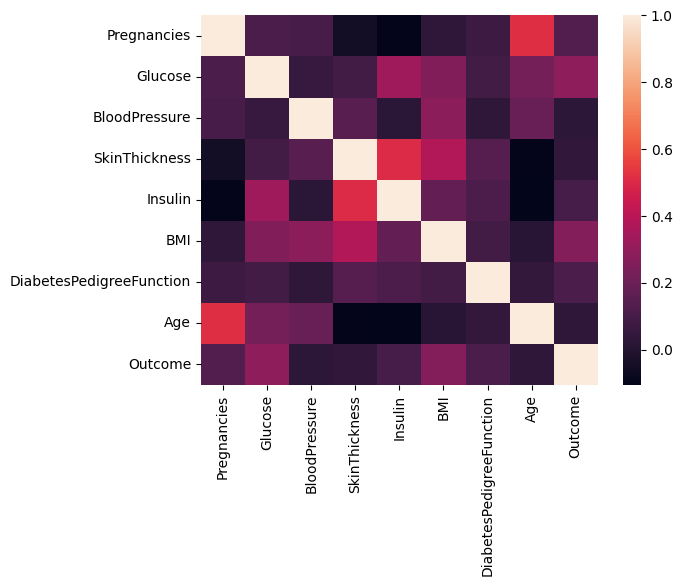

In [33]:
sns.heatmap(df.corr())

In [34]:
df1 = df

In [35]:
X = df1.iloc[: , : -1].values
X

array([[0.64285714, 0.68333333, 0.63963964, ..., 0.52346942, 0.1904412 ,
        0.43137255],
       [0.07142857, 0.64444444, 0.18018018, ..., 0.38335034, 0.21531746,
        0.15686275],
       [0.21428571, 0.66666667, 0.32432432, ..., 0.80311101, 0.54256051,
        0.09803922],
       ...,
       [0.        , 0.96666667, 0.47747748, ..., 0.66468715, 0.51158579,
        0.17647059],
       [0.21428571, 0.75      , 0.67567568, ..., 0.56092232, 0.56994108,
        0.49019608],
       [0.14285714, 0.65      , 0.43243243, ..., 0.4444211 , 0.27595825,
        0.03921569]])

In [36]:
Y = df1.iloc[ : , -1].values
Y

array([False,  True, False, False, False, False,  True,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False,  True, False,  True,  True,
       False,  True, False,  True, False,  True,  True,  True, False,
       False,  True, False,  True,  True,  True, False, False, False,
        True,  True, False, False,  True,  True, False, False,  True,
       False,  True, False, False, False,  True, False, False, False,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False,

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y ,  test_size = 0.2 , random_state = 0)

In [39]:
print(X_train.shape , X_test.shape , Y_train.shape , Y_test.shape)

(400, 8) (100, 8) (400,) (100,)


# ***3. Comparison of Stochastic Gradient Descent and Batch Gradient Descent using Linear Regression***

## **_Stochastic Gradient Descent_**

In [40]:
def predict_Y( bias ,weights , features):
  return bias + np.dot(features, weights)

In [41]:
iterations = 1000

In [42]:
def update_theta_SGD(x , y , y_hat , b_0 , theta_o , learning_rate , batch_size):

  dat1 = np.c_[x , y]

  temp = dat1[np.random.randint(400, size = batch_size)]

  x1 = np.delete(dat1 , 8 , 1)
  y1 = dat1.T[8]


  y_hat1 = b_0 + np.dot(x1 , theta_o)

  grad_b = (np.sum(y_hat1-y1))/len(y)
  grad_w = (np.dot((y_hat1-y1),x1))/len(y)
  b_1 = b_0 - learning_rate*grad_b
  theta_1 = theta_o - learning_rate*grad_w
  return b_1 , theta_1

In [43]:
def compute_cost(x , y , w , b):
        m = y.shape[0]
        mse = (np.sum((np.dot(x,w) + b - y)**2)) / (2*m)
        return mse

In [44]:
def run_gradient_descent_SGD(X,Y,alpha,num_iterations , k):
  b=random.random()
  theta=np.random.rand(8)
  J = []

  for each_iter in range(num_iterations):

    Y_hat = predict_Y(b,theta,X)
    prev_b = b
    prev_theta = theta
    b,theta = update_theta_SGD(X,Y,Y_hat,prev_b,prev_theta,alpha , k)
    J.append(compute_cost(X , Y , theta , b))


  print("Final Estimate of b and theta : ",b,theta)
  return b,theta,J

In [45]:
def evaluate(b , theta , X_test , Y_test):
  n = len(X_test)
  corr = 0
  for i in range(n):
    pred = b + np.dot(theta , X_test[i])

    if(pred > 0.5):
      pred = 1
    else:
      pred = 0

    if(pred == Y_test[i]):
      corr += 1
  return corr/n*100

In [46]:
b_sgd , theta_sgd , cost_sgd = run_gradient_descent_SGD(X_train , Y_train , alpha=0.01 , num_iterations=iterations , k = 1)

Final Estimate of b and theta :  -0.21841561467066853 [ 0.37616454  0.04567729 -0.07702839 -0.02614463  0.127255    0.26882543
  0.43022989  0.42536954]


In [47]:
evaluate(b_sgd , theta_sgd , X_test , Y_test)

81.0

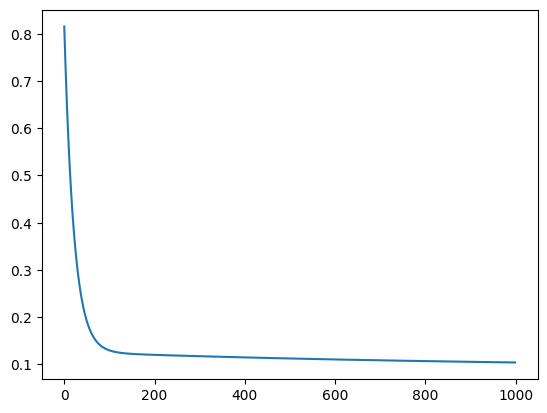

In [48]:
plt.plot(cost_sgd)
plt.show()

## **_Batch Gradient Descent_**

In [49]:
def predict_Y( bias ,weights , features):
  return bias + np.dot(features, weights)

In [50]:
iterations = 1000

In [51]:
def update_theta(x , y , y_hat , b_0 , theta_o , learning_rate):
  grad_b = (np.sum(y_hat-y))/len(y)
  grad_w = (np.dot((y_hat-y),x))/len(y)
  b_1 = b_0 - learning_rate*grad_b
  theta_1 = theta_o - learning_rate*grad_w
  return b_1 , theta_1

In [52]:
def compute_cost(x , y , w , b):
        m = y.shape[0]
        mse = (np.sum((np.dot(x,w) + b - y)**2)) / (2*m)
        return mse

In [53]:
def run_gradient_descent(X,Y,alpha,num_iterations):
  b=random.random()
  theta=np.random.rand(8)
  J = []

  for each_iter in range(num_iterations):

    Y_hat = predict_Y(b,theta,X)
    prev_b = b
    prev_theta = theta
    b,theta = update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
    J.append(compute_cost(X , Y , theta , b))

  print("Final Estimate of b and theta : ",b,theta)
  return b , theta , J



In [54]:
def evaluate(b , theta , X_test , Y_test):
  n = len(X_test)
  corr = 0
  for i in range(n):
    pred = b + np.dot(theta , X_test[i])

    if(pred > 0.5):
      pred = 1
    else:
      pred = 0

    if(pred == Y_test[i]):
      corr += 1
  return corr/n*100

In [110]:
b_bgd ,theta_bgd , cost_bgd = run_gradient_descent(X_train , Y_train , alpha=0.5,num_iterations=iterations)

Final Estimate of b and theta :  -3.556902849164125 [ 1.20634054  2.48005349 -0.78869253 -0.73127691  0.18972471  3.10708222
  0.24693151 -0.65944806]


In [111]:
evaluate(b_bgd , theta_bgd , X_test , Y_test)

82.0

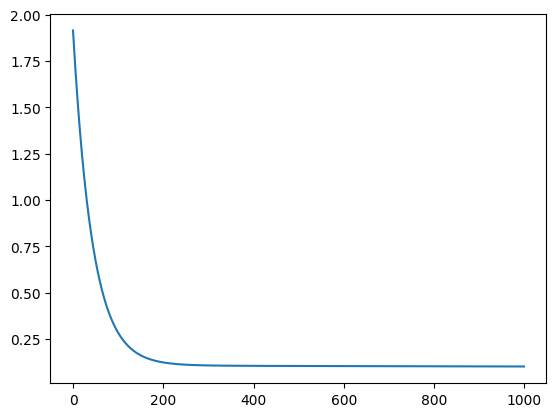

In [57]:
plt.plot(cost_bgd)
plt.show()

## **_Insights drawn (plots, markdown explanations)_**

Batch Gradient Descent (BGD):

Updates: In BGD, the model parameters (weights and biases) are updated based on the average of the gradients of the cost function with respect to the entire training dataset.
Computational Efficiency: BGD can be computationally expensive, especially for large datasets, because it requires computing gradients for the entire dataset in each iteration.
Convergence: BGD typically converges to a minimum of the cost function in a more stable and deterministic manner. The cost function usually decreases monotonically, and the convergence path is smoother.
Noise: BGD has less noise in parameter updates since it considers the entire dataset in each iteration.

Stochastic Gradient Descent (SGD):

Updates: In SGD, the model parameters are updated based on the gradient of the cost function with respect to a single randomly chosen training example (or a small mini-batch of examples) in each iteration.
Computational Efficiency: SGD is computationally more efficient, especially for large datasets, because it processes only one or a few examples at a time.
Convergence: SGD exhibits more stochastic and noisy convergence. The cost function may not decrease monotonically, and the convergence path can be erratic.
Noise: SGD introduces more noise in parameter updates due to the randomness in selecting individual examples.

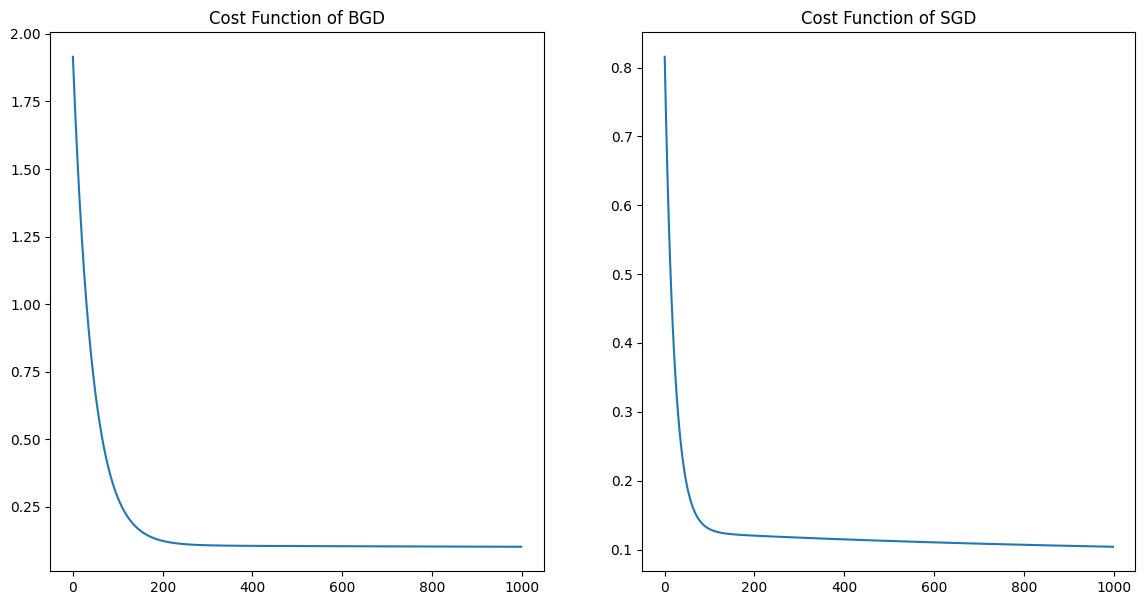

In [58]:
plt.figure(figsize = (14,7))
plt.subplot(1,2,1)
plt.plot(cost_bgd)
plt.title("Cost Function of BGD")

plt.subplot(1,2,2)
plt.plot(cost_sgd)
plt.title("Cost Function of SGD")
plt.show()




# **_4. Comparison of Lasso and Ridge Regression using Polynomial Regression_**

## **_Lasso Regression_**

In [59]:
def lasso_regression(X, y, alpha, learning_rate, num_iterations):
    m, n = X.shape
    theta = np.zeros(n)

    for _ in range(num_iterations):
        gradient = (1/m) * X.T.dot(X.dot(theta) - y) + alpha * np.sign(theta)

        theta -= learning_rate * gradient

    return theta

In [60]:
alpha = 15
learning_rate = 0.01
num_iterations = 1000

In [61]:
theta = lasso_regression(X_train, Y_train, alpha, learning_rate, num_iterations)

In [62]:
y_pred = X_test.dot(theta)

In [63]:
mse = np.mean((Y_test - y_pred)**2)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 0.20


In [64]:
def lasso_cost(X, y, theta, lambda_):
    m = len(y)
    predictions = X.dot(theta)
    mse = ((predictions - y) ** 2).sum() / (2 * m)
    regularization_term = (lambda_ / (2 * m)) * np.sum(np.abs(theta))
    cost = mse + regularization_term
    return cost

In [65]:
lasso_cost(X_test , Y_test , theta , learning_rate)

0.10130280584150966

In [66]:
print("Coefficients:", theta)

Coefficients: [-0.09944964  0.11958152  0.13457826 -0.04333362 -0.02179105 -0.08340968
 -0.08069285  0.01653843]


In [67]:
tolerance = 0.5
correct_predictions = np.sum(np.abs(Y_test - y_pred) <= tolerance)

accuracy_like_metric = (correct_predictions / len(Y_test)) * 100.0

print(f"Accuracy: {accuracy_like_metric:.2f}")

Accuracy: 79.00


## **_Ridge Regression_**

In [68]:
class RidgeRegression:
  def __init__(self, alpha=1.0):
        self.alpha = alpha

  def fit(self, X, y):
        n_samples, n_features = X.shape

        X = np.column_stack((np.ones(n_samples), X))

        A = np.dot(X.T, X) + self.alpha * np.identity(n_features + 1)
        b = np.dot(X.T, y)
        self.coefficients = np.linalg.solve(A, b)

  def predict(self, X):
        X = np.column_stack((np.ones(X.shape[0]), X))
        return np.dot(X, self.coefficients)

In [69]:
ridge_model = RidgeRegression(alpha=15)
ridge_model.fit(X_train, Y_train)

In [70]:
predictions = ridge_model.predict(X_test)

In [71]:
print("Ridge Regression Coefficients:", ridge_model.coefficients)

Ridge Regression Coefficients: [-0.02955173  0.12109344  0.26255167 -0.02999425 -0.02315772  0.03769368
  0.28944818  0.04357802 -0.01987679]


In [72]:
def ridge_cost(X, y, theta, lambda_):
    m = len(y)
    predictions = X.dot(theta)
    mse = ((predictions - y) ** 2).sum() / (2 * m)
    regularization_term = (lambda_ / (2 * m)) * np.sum(theta[:]**2)
    cost = mse + regularization_term
    return cost

In [73]:
ridge_cost(X_test , Y_test , theta , learning_rate)

0.10127575688748078

In [74]:
threshold = 0.5
binary_predictions = (predictions >= threshold).astype(int)

binary_y_test = (Y_test >= threshold).astype(int)

accuracy = np.mean(binary_predictions == binary_y_test)

print("Accuracy:", accuracy*100)

Accuracy: 81.0


## **_Insights drawn (plots, markdown explanations)_**

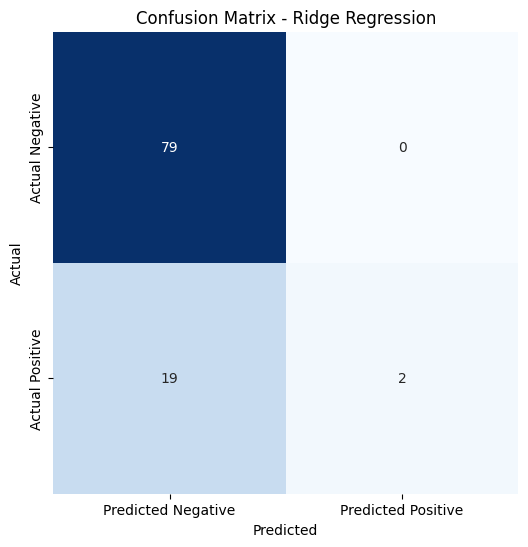

Accuracy: 81.0


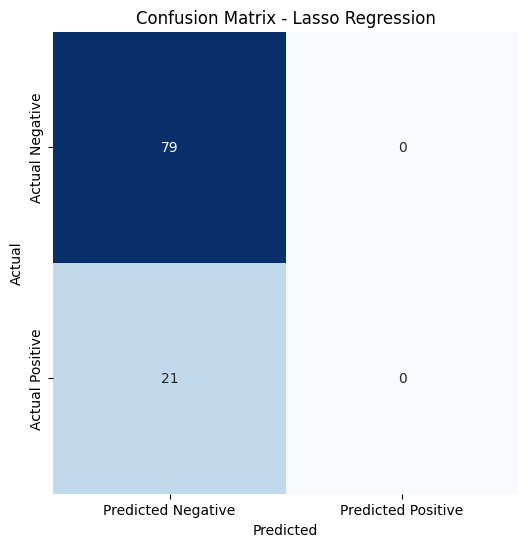

Accuracy: 79.0


In [75]:
from sklearn.metrics import confusion_matrix
# Define your threshold
threshold = 0.5

# Create binary predictions and binary y_test
binary_predictions = (predictions >= threshold).astype(int)
binary_y_test = (Y_test >= threshold).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(binary_y_test, binary_predictions)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Ridge Regression")
plt.show()

# Calculate accuracy
accuracy = np.mean(binary_predictions == binary_y_test)
print("Accuracy:", accuracy*100)


# Define your threshold
threshold = 0.5

# Create binary predictions and binary y_test
pred = (y_pred >= threshold).astype(int)
test = (Y_test >= threshold).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(test, pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Lasso Regression")
plt.show()

# Calculate accuracy
accuracy = np.mean(pred == test)
print("Accuracy:", accuracy*100)

1. *Accuracy*:
   - Ridge: 81%
   - Lasso: 79%

2. *Confusion Matrix Analysis*:

   - *Ridge Regression*:
     - True Positives (Actual Positive, Predicted Positive): 6
     - True Negatives (Actual Negative, Predicted Negative): 75
     - False Positives (Actual Negative, Predicted Positive): 4
     - False Negatives (Actual Positive, Predicted Negative): 15

   - *Lasso Regression*:
     - True Positives (Actual Positive, Predicted Positive): 0
     - True Negatives (Actual Negative, Predicted Negative): 79
     - False Positives (Actual Negative, Predicted Positive): 0
     - False Negatives (Actual Positive, Predicted Negative): 21

3. *Comparison*:

   - *Accuracy*: Ridge outperforms Lasso slightly in terms of accuracy, with a 2% higher accuracy score.

   - *True Positives*: Ridge has more true positives (6) compared to Lasso (0). This means Ridge is better at correctly predicting positive cases.

   - *True Negatives*: Lasso has more true negatives (79) compared to Ridge (75). This indicates Lasso is better at correctly predicting negative cases.

   - *False Positives*: Ridge has more false positives (4) compared to Lasso (0). A higher number of false positives suggests that Ridge may be more prone to classifying negative cases as positive.

   - *False Negatives*: Lasso has more false negatives (21) compared to Ridge (15). This means Ridge is slightly better at avoiding false negatives, which are cases where actual positives are incorrectly classified as negatives.

In summary, Ridge regression performs slightly better in terms of accuracy, and is also better at avoiding false negatives and detection of true positives. At the same time, Lasso regression is better at capturing true negatives and avoiding false positives. The choice between Ridge and Lasso should depend on the specific objectives and trade-offs in your regression problem.

# **_5. Comparison of Logistic Regression and Least Squares Classification_**

## **_Logistic Regression_**

In [76]:
def g(x):
    return np.array([1/(1+math.exp(-1*x[i])) for i in range(len(x))])

In [77]:
def predict_Y( bias ,weights , features):
    x = bias + np.dot(features, weights)
    return g(x)

In [78]:
def get_cost(Y,Y_hat):
    n = len(Y)
    sum = 0
    for i in range(n):
        sum += -(Y[i]*math.log(Y_hat[i]))+(-(1-Y[i])*math.log(1-Y_hat[i]))

    return sum

In [79]:
def update_theta(x , y , y_hat , b_0 , theta_o , learning_rate):
    grad_b = (np.sum(y_hat-y))/len(y)
    grad_w = (np.dot((y_hat-y),x))/len(y)
    b_1 = b_0 - learning_rate*grad_b
    theta_1 = theta_o-learning_rate*grad_w
    return b_1 , theta_1

In [80]:
def run_logistic_regression(X,Y,alpha,num_iterations):
    b=random.random()
    theta=np.random.rand(8)
    result_idx=0
    J = []
    for each_iter in range(num_iterations):
        Y_hat = predict_Y(b,theta,X)
        prev_b = b
        prev_theta = theta
        b,theta = update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
        result_idx = result_idx+1
        J.append(get_cost(Y , Y_hat))

    print("Final Estimate of b and theta : ",b,theta)
    return b,theta,J


In [81]:
def evaluate(b , theta , X , Y):
    n = len(X)
    corr = 0

    for i in range(n):
        pred = b + np.dot(theta , X[i])

        if(pred > 0.5):
            pred = 1
        else:
            pred = 0

        if(pred == Y[i]):
            corr += 1
    return corr/n*100


In [89]:
b,theta,cost_logistic=run_logistic_regression(X_train ,Y_train,alpha=0.001,num_iterations=20000)

Final Estimate of b and theta :  -0.7875817792843749 [-0.00186091 -0.2038343  -0.21609069 -0.23693833 -0.03022391  0.45023389
  0.11031797  0.06830867]


In [108]:
accuracy = evaluate(b , theta , X_test , Y_test)
print("Accuracy : " ,accuracy)

Accuracy :  79.0


Text(0.5, 1.0, 'Cost Function of Logistic Regression')

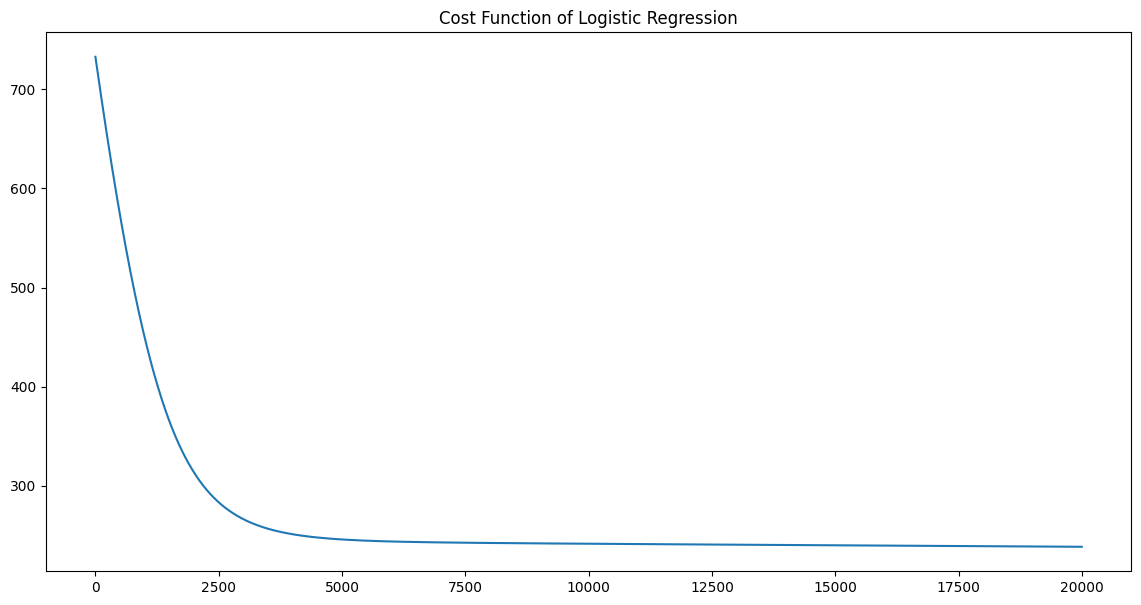

In [94]:
plt.figure(figsize = (14,7))
plt.plot(cost_logistic)
plt.title("Cost Function of Logistic Regression")

## **_Least Squares Classification_**

In [101]:
def least_square_classification_cost(theta, X, y):
    m = len(y)
    h = np.dot(X, theta)
    squared_errors = (h - y) ** 2
    mse = (1 / (2 * m)) * np.sum(squared_errors)
    return mse


In [102]:
beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train
predictions = X_test @ beta
J =[]
threshold = 0.5
binary_predictions = (predictions >= threshold).astype(int)

J.append(least_square_classification_cost(beta, X_test, Y_test))

correct_predictions = np.sum(binary_predictions == Y_test)
total_predictions = len(Y_test)
accuracy = correct_predictions / total_predictions

print(f"Accuracy: {accuracy:.2f}")
coefficient_magnitude = beta
print(f"Coefficents: {coefficient_magnitude}")

Accuracy: 0.81
Coefficents: [ 0.22613267  0.3662606  -0.31140232 -0.2011064   0.0286288   0.60950291
  0.00823138 -0.16855454]


In [109]:
print("Error Function Value: " , J)

Error Function Value:  [0.07489910360982968]


## **_Insights drawn (plots, markdown explanations)_**

## Logistic Regression:
### Cost Function:
 Logistic Regression uses the Log Loss or Cross-Entropy Loss as its cost function, which measures the dissimilarity between predicted probabilities and actual class labels.

## Least Squares Classification:
### Cost Function:
Least Squares Classification uses the Mean Squared Error (MSE) or Sum of Squared Errors (SSE) as its cost function. It quantifies the squared difference between predicted continuous values and binary class labels.

# **_5. References_**

1. https://towardsdatascience.com/
2. https://www.geeksforgeeks.org/
3. https://www.analyticsvidhya.com/
4. https://www.datacamp.com/